In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



In [2]:
df=pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
print(df.isnull())

     Order_ID  Customer_Location  Restaurant_Location  Distance  \
0       False              False                False     False   
1       False              False                False     False   
2       False              False                False     False   
3       False              False                False     False   
4       False              False                False     False   
..        ...                ...                  ...       ...   
195     False              False                False     False   
196     False              False                False     False   
197     False              False                False     False   
198     False              False                False     False   
199     False              False                False     False   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                 False               False                       False   
1                 False               False  

In [19]:
df_cat = df.select_dtypes(np.object_)
df_num = df.select_dtypes(np.number)

In [20]:
df_cat

,Order_ID,Customer_Location,Restaurant_Location,Weather_Conditions,Traffic_Conditions,Order_Priority,Order_Time,Vehicle_Type
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",Rainy,Medium,Medium,Afternoon,Car
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",Cloudy,Medium,Low,Night,Car
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",Snowy,Medium,High,Night,Bike
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",Cloudy,Low,Medium,Evening,Bike
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",Rainy,High,Low,Night,Bike
...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",Cloudy,High,Medium,Night,Bike
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",Snowy,Medium,Low,Night,Bicycle
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",Snowy,High,Medium,Afternoon,Bike
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",Rainy,High,Low,Night,Car


In [21]:
cols = list(df_cat.columns)

def cat_to_num(df, cols):
    for col in cols:
        dummies = pd.get_dummies(df[col], drop_first=True, prefix=col)
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    return df

# Usage
df_cat = cat_to_num(df_cat, cols)


In [23]:
df_cat.dtypes

Order_ID_ORD0002      bool
Order_ID_ORD0003      bool
Order_ID_ORD0004      bool
Order_ID_ORD0005      bool
Order_ID_ORD0006      bool
                      ... 
Order_Time_Evening    bool
Order_Time_Morning    bool
Order_Time_Night      bool
Vehicle_Type_Bike     bool
Vehicle_Type_Car      bool
Length: 609, dtype: object

In [25]:
df_ml= pd.concat([df_cat, df_num])

In [26]:
df_ml.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [27]:
print(df.describe())

         Distance  Delivery_Person_Experience  Restaurant_Rating  \
count  200.000000                  200.000000         200.000000   
mean    11.498050                    5.250000           3.738500   
std      6.841755                    2.745027           0.703021   
min      0.520000                    1.000000           2.500000   
25%      6.090000                    3.000000           3.200000   
50%     10.265000                    5.000000           3.800000   
75%     16.497500                    8.000000           4.300000   
max     24.900000                   10.000000           5.000000   

       Customer_Rating  Delivery_Time   Order_Cost  Tip_Amount  
count       200.000000     200.000000   200.000000  200.000000  
mean          3.686500      70.494950  1046.488700   46.616650  
std           0.697063      29.830694   548.568922   29.361706  
min           2.600000      15.230000   122.300000    1.240000  
25%           3.100000      46.997500   553.270000   21.602500

In [28]:
#correlation analysis

corr = df_ml.corr(numeric_only=True)
corr


,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
Distance,1.000000,0.017562,0.064676,0.003430,-0.075143,-0.022275,-0.006466
Delivery_Person_Experience,0.017562,1.000000,-0.004492,-0.122447,-0.019098,0.061015,-0.069218
Restaurant_Rating,0.064676,-0.004492,1.000000,0.101661,-0.091855,-0.106870,-0.035759
Customer_Rating,0.003430,-0.122447,0.101661,1.000000,-0.021952,0.142336,-0.074884
Delivery_Time,-0.075143,-0.019098,-0.091855,-0.021952,1.000000,-0.009307,-0.029154
Order_Cost,-0.022275,0.061015,-0.106870,0.142336,-0.009307,1.000000,0.034462
Tip_Amount,-0.006466,-0.069218,-0.035759,-0.074884,-0.029154,0.034462,1.000000


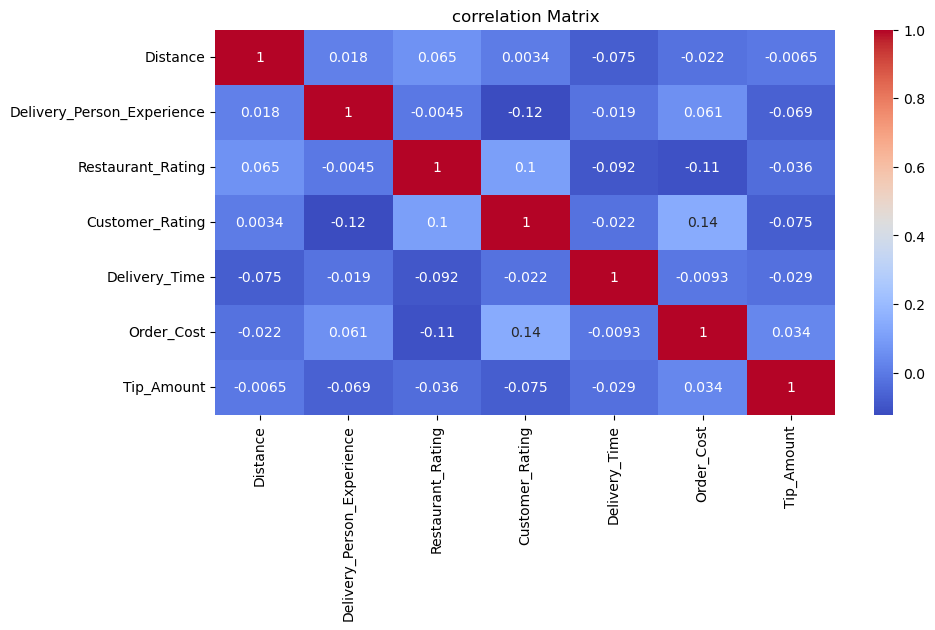

In [29]:
corr = df_ml.corr(numeric_only=True)
plt.figure(figsize=(10,5))
sns.heatmap(corr , annot=True , cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

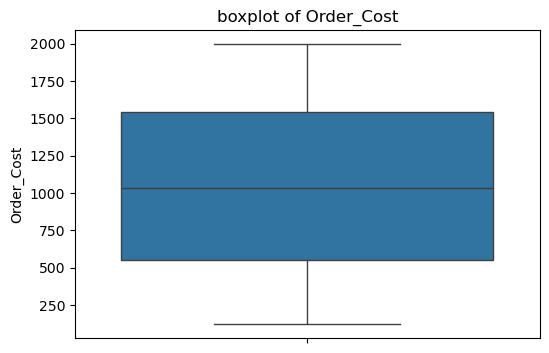

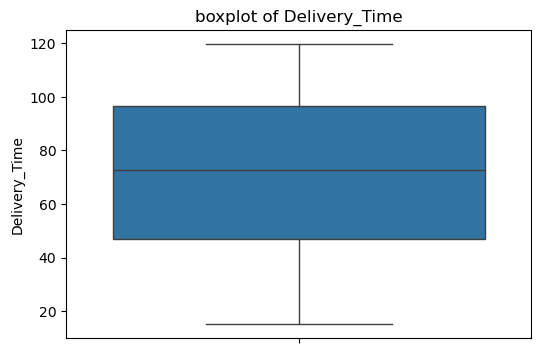

In [30]:
#outlier detection 
numrical_col = ['Order_Cost', 'Delivery_Time']

for col in numrical_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'boxplot of {col}')
    plt.show()


In [32]:
# DIstance calculation 

from math import radians , sin ,cos , asin , sqrt
 
def haversine(lon1, lat1, lon2 , lat2):


    lon1,lat1, lon2 , lat2 = map(radians , [ lon1,lat1, lon2 , lat2])

    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers
    return c * r




In [33]:
#Time based feature 



time_map={
    'Afternoon':14,
    'Evening':19,
    'Night':22
}

df['Time_encoded']= df['Order_Time'].map(time_map)

In [34]:
df_encoded = pd.get_dummies(df, columns=['Order_Time'], drop_first=True)

In [35]:
df_full = pd.concat([df_cat , df_num])


In [ ]:
print(df_ml.head())  # to preview data
print(df_ml.columns)  # to see actual column names



   Distance  Delivery_Person_Experience  Restaurant_Rating  Customer_Rating  \
0      1.57                           4                4.1              3.0   
1     21.32                           8                4.5              4.2   
2      6.95                           9                3.3              3.4   
3     13.79                           2                3.2              3.7   
4      6.72                           6                3.5              2.8   

   Delivery_Time  Order_Cost  Tip_Amount  Time_encoded  Rush_Hour  \
0          26.22     1321.10       81.54          14.0          0   
1          62.61      152.21       29.02          22.0          1   
2          48.43     1644.38       64.17          22.0          1   
3         111.63      541.25       79.23          19.0          0   
4          32.38      619.81        2.34          22.0          1   

   Weather_Conditions_Cloudy  ...  Weather_Conditions_Sunny  \
0                      False  ...              

In [ ]:
df['Rush_Hour'] = ['Order_Time_Night'].apply(lambda X: 1 if str(X).lower() == 'Night' else 0 )

df = df.drop(columns=['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Order_Time'])
df_= pd.get_dummies(df)

X = df.drop('Rush_Hour')
y = df['Rush_Hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

KeyError: "['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Order_Time'] not found in axis"